In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Question 1: Basic Quicksort

In [3]:
def basic_quicksort(arr):
    #stopping condition for array size <= 1
    if len(arr) <= 1:
        return arr
    
    #middle elem as pivot
    pivot = arr[len(arr) // 2]
    
    #basic quicksort using list comprehensionz
    left = [x for x in arr if x < pivot] 
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    #recursive sorting and if reached end; as in size <= 1, returns arr recursively
    return basic_quicksort(left) + middle + basic_quicksort(right)
    #returning combined left + middle + right once

In [4]:
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3]
sorted_arr = basic_quicksort(arr)
sorted_arr

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Question 2: Partitioning

In [9]:
def partition(arr, start, end): #위의 basic과 달리 실제 quicksort는 partition을 사용해 inplace로 정렬
    pivot = arr[end]         #pivot elem at index r (end index)
    i = start - 1               #starts from out of bound (index -1)
    for j in range(start, end):  #using range, automatically excludes index r pivot elem
        if arr[j] <= pivot:  #only if elem at index j belongs in low side
            i = i + 1         #move i up (to consider starting from -1 index)
            arr[i], arr[j] = arr[j], arr[i]         #move j elem to low side
    #update pivot elem to +1 next to low side        
    arr[i + 1], arr[end] = arr[end], arr[i + 1] 
    return i + 1             #return updated pivot index final location

In [9]:
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3]
pivot_index = partition(arr, 0, len(arr) - 1)
print("pivot index:", pivot_index)
print("after partition:", arr)     #partition called one time

pivot index: 3
after partition: [2, 0, 1, 3, 5, 7, 8, 4, 9, 6]


### Question 3: Quicksort with Partitioning

In [10]:
def quicksort(arr, start, end):
    if start < end:                              #as long as [p...r] array exists
        pivot_index = partition(arr, start, end) #sorting using pivot will happen in recursive way 
        #regarding newly divided two partions;
        quicksort(arr, start, pivot_index - 1) #recursively call sorting on low side
        quicksort(arr, pivot_index + 1, end)   #recursively call sorting on high side

In [11]:
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3]
quicksort(arr, 0, len(arr) - 1)
print("Quicksort Result:", arr)

Quicksort Result: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Question 4: Randomized Quicksort

In [12]:
def randomized_partition(arr, start, end):
    pivot_index = np.random.randint(start, end) #picks random index for pivot elem besides r (end)
    arr[pivot_index], arr[end] = arr[end], arr[pivot_index] #update to new pivot elem
    return partition(arr, start, end) 
    #using the new pivot, call partition then, return once-sorted result with updated pivot index

In [13]:
def randomized_quicksort(arr, start, end):
    if start < end:                  #as long as [p...r] array exists
        #each time pivot_index will be different (to prevent worst balanced sorting keeps happening)
        pivot_index = randomized_partition(arr, start, end)
        #regarding newly divided two partions;
        randomized_quicksort(arr, start, pivot_index - 1) #recursively sorting low side
        randomized_quicksort(arr, pivot_index + 1, end)   #recursively sorting high side

In [14]:
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3]
randomized_quicksort(arr, 0, len(arr) - 1)
print("Randomized Quicksort Result:", arr)

Randomized Quicksort Result: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Checking Time: Quicksort vs Randomized Quicksort

In [19]:
import sys
#increase recursion limit to 2000 (default: 1000)
sys.setrecursionlimit(2000) 
#generate random large arrays: each appends random values for range times
arr1 = [np.random.randint(0, 100000) for _ in range(100000)] 
arr2 = [np.random.randint(0, 1000000) for _ in range(1000000)]

In [20]:
#Quicksort: check elapsed time for array 1 and 2
start_time = time.time()
quicksort(arr1, 0, len(arr1) - 1)
end_time = time.time()
print('Elapsed time for array size {}, using Quicksort: {} sec'.format(len(arr1), end_time - start_time))

start_time = time.time()
quicksort(arr2, 0, len(arr2) - 1)
end_time = time.time()
print('Elapsed time for array size {}, using Quicksort: {} sec'.format(len(arr2), end_time - start_time))      

Elapsed time for array size 100000, using Quicksort: 0.14184856414794922 sec
Elapsed time for array size 1000000, using Quicksort: 1.9873261451721191 sec


In [22]:
#Randomized Quicksort: check elapsed time for array 1 and 2
start_time = time.time()
randomized_quicksort(arr1, 0, len(arr1) - 1)
end_time = time.time()
print('Elapsed time for array size {}, using Randomized Quicksort: {} sec'.format(len(arr1), end_time - start_time))

start_time = time.time()
randomized_quicksort(arr2, 0, len(arr2) - 1)
end_time = time.time()
print('Elapsed time for array size {}, using Randomized Quicksort: {} sec'.format(len(arr2), end_time - start_time))      

Elapsed time for array size 100000, using Randomized Quicksort: 0.2930576801300049 sec
Elapsed time for array size 1000000, using Randomized Quicksort: 3.3336222171783447 sec


> Conclusion:
randomized quicksort takes more time, why? random_partition에서 추가 연산이 존재하므로.
then why use it?
if imbalance(worst case) happens each time in partitioning, will take O(n^2)
by randomized partition, can avoid: imbalance keeps happening, will take O(n log n)

### Question 5: Descending Order of Randomized Quicksort

In [1]:
def partition_descending(arr, start, end):
    pivot = arr[end]         #pivot elem at index r (end index)
    i = start - 1               #starts from out of bound (index -1)
    for j in range(start, end):  #using range, automatically excludes index r pivot elem
        if arr[j] >= pivot:  #only if elem at index j belongs in low side **larger value**
            i = i + 1         #move i up (to consider starting from -1 index)
            arr[i], arr[j] = arr[j], arr[i]         #move j elem to low side
    #update pivot elem to +1 next to low side        
    arr[i + 1], arr[end] = arr[end], arr[i + 1] 
    return i + 1             #return updated pivot index final location

In [2]:
def randomized_partition_descending(arr, start, end):
    pivot_index = np.random.randint(start, end)  #picks random index for pivot elem besides r (end)
    arr[pivot_index], arr[end] = arr[end], arr[pivot_index] #update to new pivot elem
    return partition_descending(arr, start, end) #**descending order**
    #using the new pivot, call partition then, return once-sorted result with updated pivot index

In [3]:
def randomized_quicksort_descending(arr, start, end):
    if start < end:                  #as long as [p...r] array exists
        #each time pivot_index will be different (to prevent worst balanced sorting keeps happening)
        pivot_index = randomized_partition_descending(arr, start, end) #**descending order**
        #regarding newly divided two partions;
        randomized_quicksort_descending(arr, start, pivot_index - 1) #recursively sorting low side
        randomized_quicksort_descending(arr, pivot_index + 1, end)   #recursively sorting high side

In [7]:
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3]
randomized_quicksort_descending(arr, 0, len(arr) - 1)
print("Randomized Quicksort Descending Order Result:", arr)

Randomized Quicksort Descending Order Result: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


### Checking Time Growth: Quicksort

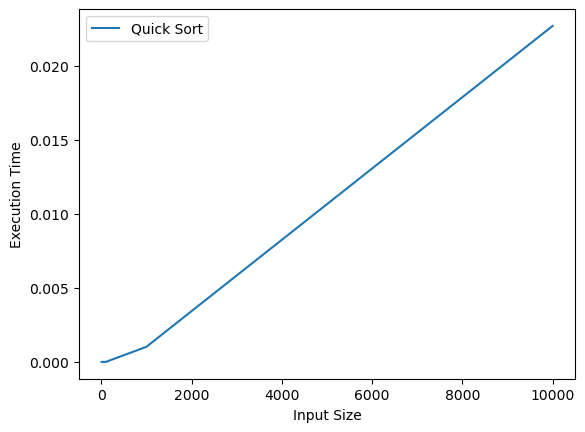

In [13]:
sample_sizes = [10, 100, 1000, 10000]
quick_times = []
for size in sample_sizes:
    #creates arr_quick of size with random values within randint (repeats 4 times)
    arr_quick = [np.random.randint(0, 10000) for _ in range(size)]
    
    start_time = time.time()
    quicksort(arr_quick, 0, len(arr_quick)-1)
    end_time = time.time()
    #appends checked time result (repeats 4 times)
    quick_times.append(end_time - start_time)

#plot graph
plt.plot(sample_sizes, quick_times, label='Quick Sort') #4 data points
#plot text
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.legend()
#show graph
plt.show()

> selection == insertion : O(n^2)
> quick <= merge == heap : O(nlogn)
(quicksort is similar to merge sort but has more small number of constants)